In [1068]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as  sm

In [1069]:
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",header=None,names=["sym","nor_los","make","fuel_type","asp","no_door","body_style","d_wheel","engine_loc","wheel_base","length","width","height","curb_weight","engine_type","no_cyl","engine_size","fuel_system","bore","stroke","com_ratio","hpower","peak_rpm","city_mpg","high_mpg","price"],na_values='?')

In [1070]:
data.head()

,sym,nor_los,make,fuel_type,asp,no_door,body_style,d_wheel,engine_loc,wheel_base,...,engine_size,fuel_system,bore,stroke,com_ratio,hpower,peak_rpm,city_mpg,high_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<H6>
COLUMN 1 SYMBOLING
<H6>

In [1071]:
data.sym.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: sym, dtype: int64

In [1072]:
data.sym.isnull().sum()

0

In [1073]:
data.sym.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sym', ylabel='count'>

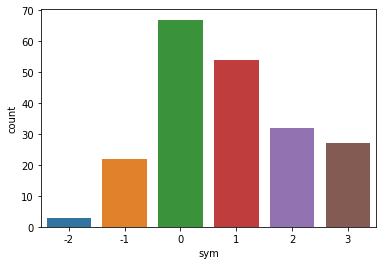

In [1074]:
sns.countplot(data.sym)

<H6>
data is re arranged  as less than zero,zero,one,two,three
<H6>

In [1075]:
data.sym.replace([-2,-1,0,1,2,3],['less than zero','less than zero','zero','one','two','three'],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sym', ylabel='count'>

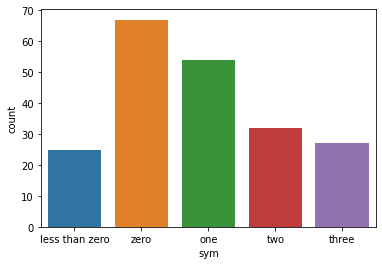

In [1076]:
sns.countplot(data.sym,order=['less than zero','zero','one','two','three'])

<H6>
COLUMN2:  NORMALIZED LOSES
    <H6>

In [1077]:
data.nor_los.isnull().sum()


41

In [1078]:
data.nor_los.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: nor_los, dtype: float64

In [1079]:
data.nor_los.fillna(data.nor_los.mean(),inplace=True)

In [1080]:
data.nor_los.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1ead2fe5ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ead2ff6130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ead2fe5730>],
 'medians': [<matplotlib.lines.Line2D at 0x1ead2ff6850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ead2ff6be0>],
 'means': []}

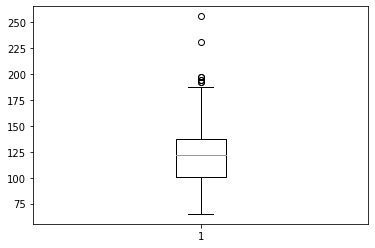

In [1081]:
plt.boxplot(data.nor_los)

In [1082]:
data.nor_los.unique()

array([122., 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 103., 168., 108., 194.,
       231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,  91.,
       134.,  65., 197.,  90.,  94., 256.,  95.])

(array([17., 46., 72., 20., 21., 18.,  9.,  0.,  1.,  1.]),
 array([ 65. ,  84.1, 103.2, 122.3, 141.4, 160.5, 179.6, 198.7, 217.8,
        236.9, 256. ]),
 <BarContainer object of 10 artists>)

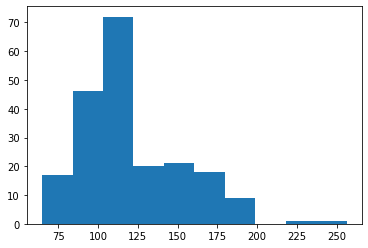

In [1083]:
plt.hist(data.nor_los)

<H6> 
COLUMN  3:MAKE
    <H6>

In [1084]:
data.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [1085]:
data.make.isnull().sum()

0

In [1086]:
data.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='make', ylabel='count'>

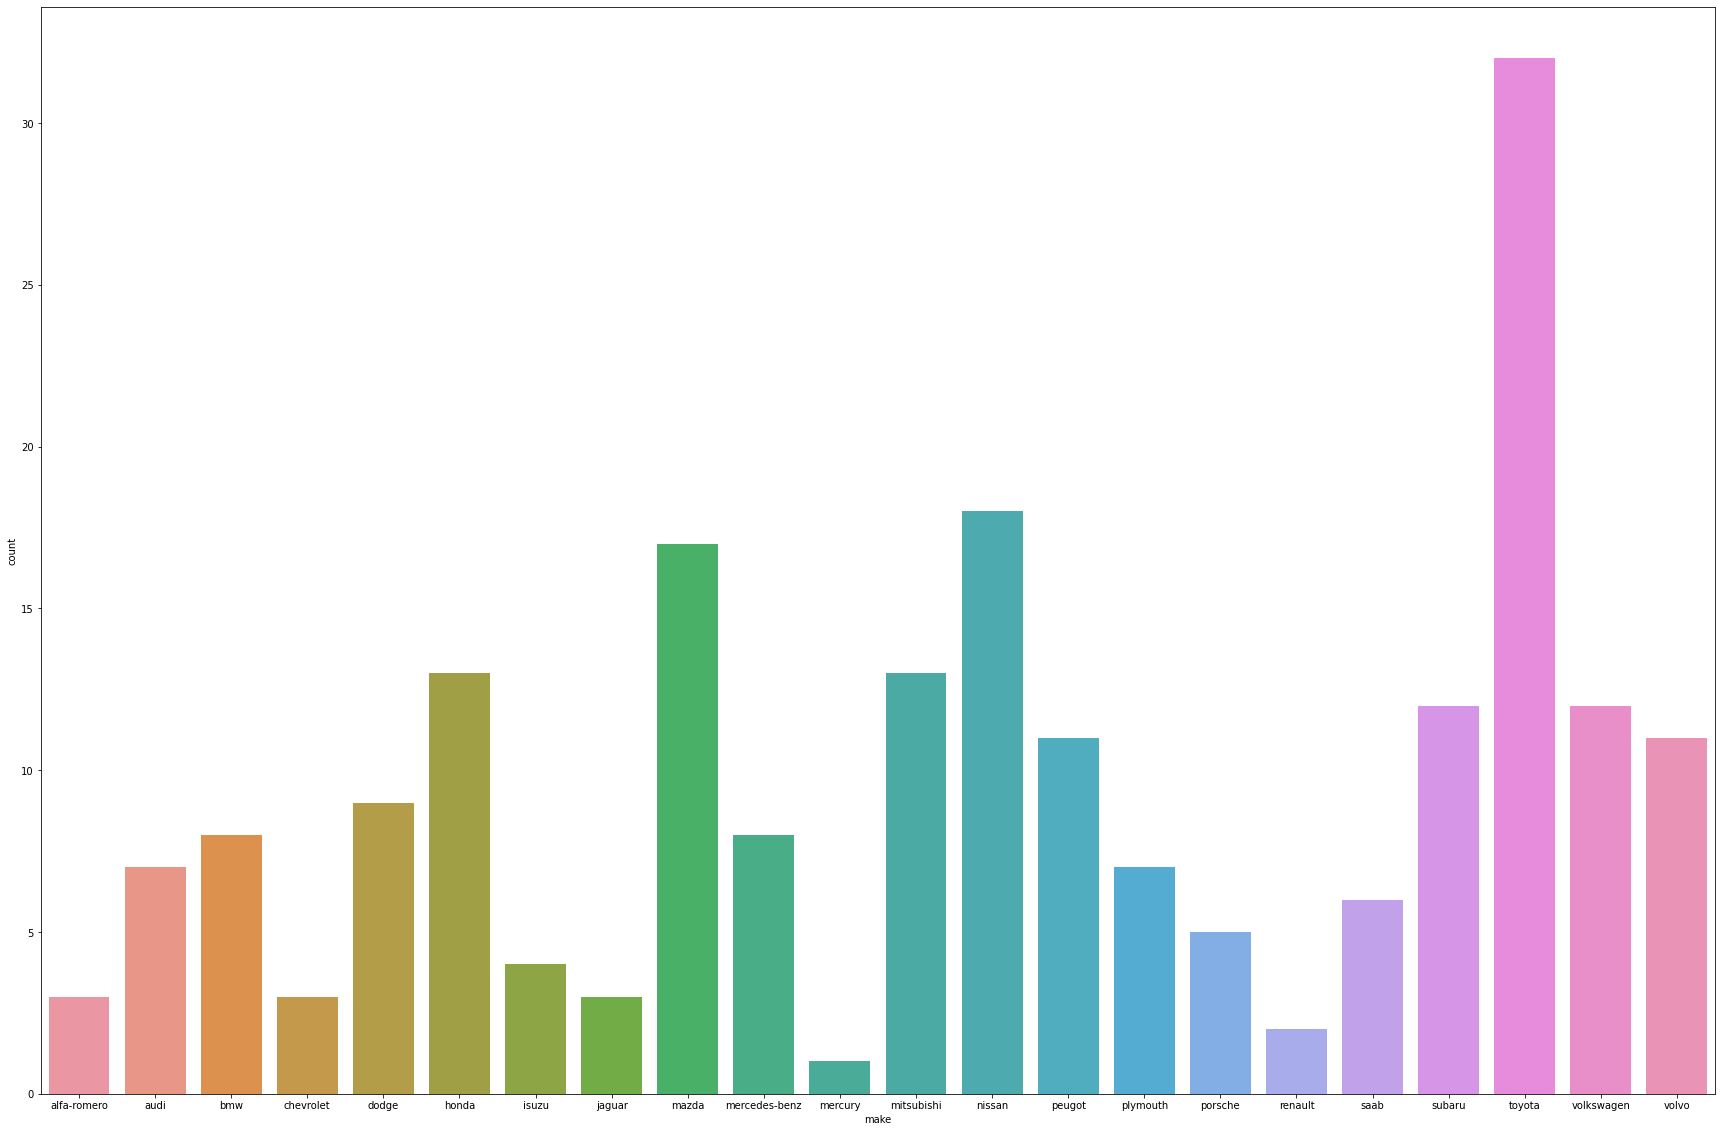

In [1087]:
plt.figure(figsize=(30,20))
sns.countplot(data.make)

<H6>
COLUMN4: FUEL TYPES
    <H6>

In [1088]:
data.fuel_type.value_counts()

gas       185
diesel     20
Name: fuel_type, dtype: int64

In [1089]:
data.fuel_type.isnull().sum()

0

In [1090]:
data.fuel_type.unique()

array(['gas', 'diesel'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_type', ylabel='count'>

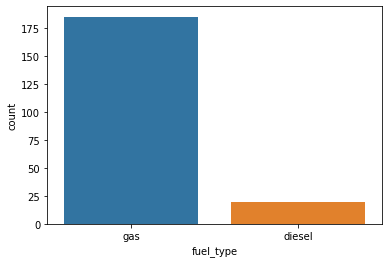

In [1091]:
sns.countplot(data.fuel_type)

<H6>
COLUMN5: ASPIRATION
    <H6>

In [1092]:
data.asp.describe()

count     205
unique      2
top       std
freq      168
Name: asp, dtype: object

In [1093]:
data.asp.value_counts()

std      168
turbo     37
Name: asp, dtype: int64

In [1094]:
data.asp.isnull().sum()

0

In [1095]:
data.asp.unique()

array(['std', 'turbo'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='asp', ylabel='count'>

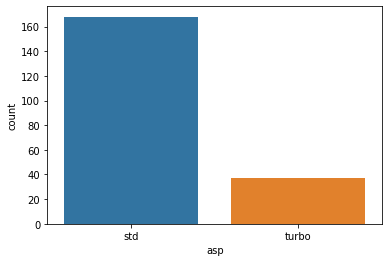

In [1096]:
sns.countplot(data.asp)

<H6>
COLUMN 6: NUMBER OF DOORS
    <H6>

In [1097]:
data.no_door.describe()

count      203
unique       2
top       four
freq       114
Name: no_door, dtype: object

In [1098]:
data.no_door.value_counts()

four    114
two      89
Name: no_door, dtype: int64

In [1099]:
data.no_door.isnull().sum()

2

In [1100]:
data.no_door.fillna('four',inplace=True)

In [1101]:
data.no_door.isnull().sum()

0

In [1102]:
data.no_door.unique()

array(['two', 'four'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_door', ylabel='count'>

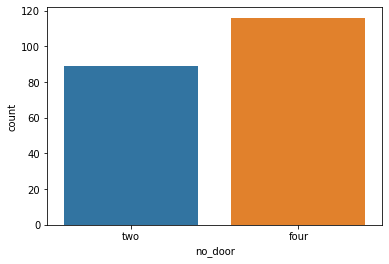

In [1103]:
sns.countplot(data.no_door)

<H6>
COLUMN 7:  BODY STYLE
    <H6>

In [1104]:
data.body_style.describe()

count       205
unique        5
top       sedan
freq         96
Name: body_style, dtype: object

In [1105]:
data.body_style.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [1106]:
data.body_style.isnull().sum()

0

In [1107]:
data.body_style.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='body_style', ylabel='count'>

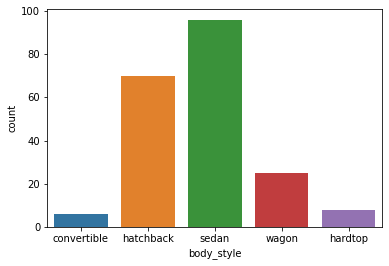

In [1108]:
sns.countplot(data.body_style)

<H6>
COLUMN 8 :DRIVE WHEELS
<H6>

In [1109]:
data.d_wheel.describe()

count     205
unique      3
top       fwd
freq      120
Name: d_wheel, dtype: object

In [1110]:
data.d_wheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: d_wheel, dtype: int64

In [1111]:
data.d_wheel.isnull().sum()

0

In [1112]:
data.d_wheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='d_wheel', ylabel='count'>

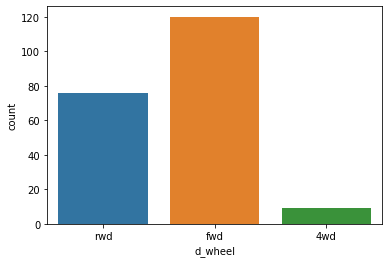

In [1113]:
sns.countplot(data.d_wheel)

In [1114]:
data.d_wheel.replace(['4wd','rwd'],['not fwd','not fwd'],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='d_wheel', ylabel='count'>

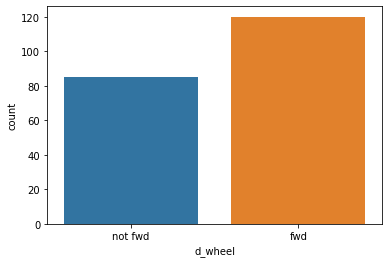

In [1115]:
sns.countplot(data.d_wheel)

<H6>
COLUMN 9:ENGINE LOCATION
    <H6>

In [1116]:
data.engine_loc.describe()

count       205
unique        2
top       front
freq        202
Name: engine_loc, dtype: object

In [1117]:
data.engine_loc.value_counts()

front    202
rear       3
Name: engine_loc, dtype: int64

In [1118]:
data.engine_loc.isnull().sum()

0

In [1119]:
data.engine_loc.unique()

array(['front', 'rear'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_loc', ylabel='count'>

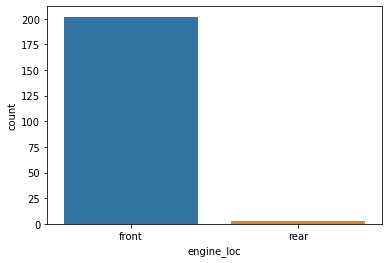

In [1120]:
sns.countplot(data.engine_loc)

<H6>
COLUMN 10 :WHEEL BASE
<H6>

In [1121]:
data.wheel_base.describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel_base, dtype: float64

In [1122]:
data.wheel_base.isnull().sum()

0

In [1123]:
data.wheel_base.unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ead340f580>,
 'caps': [<matplotlib.lines.Line2D at 0x1ead340fca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ead340f1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ead341a400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ead341a790>],
 'means': []}

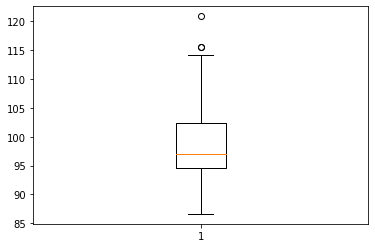

In [1124]:
plt.boxplot(data.wheel_base)

In [1125]:
stats.shapiro(data.wheel_base)

ShapiroResult(statistic=0.9115860462188721, pvalue=1.0368441660801864e-09)

<H6>
data is not normally  distributed
<H6>

(array([ 8.,  9., 83., 42., 24., 14., 15.,  3.,  6.,  1.]),
 array([ 86.6 ,  90.03,  93.46,  96.89, 100.32, 103.75, 107.18, 110.61,
        114.04, 117.47, 120.9 ]),
 <BarContainer object of 10 artists>)

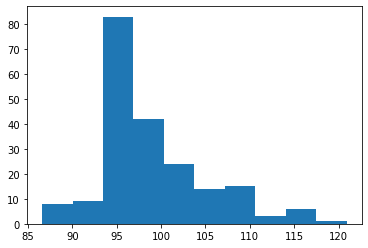

In [1126]:
plt.hist(data.wheel_base)

<H6>
COLUMN 11 : LENGTH
    <H6>

In [1127]:
data.length.describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64

In [1128]:
data.length.isnull().sum()

0

In [1129]:
data.length.unique()

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ead34fc9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ead350b130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ead34fc640>],
 'medians': [<matplotlib.lines.Line2D at 0x1ead350b850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ead350bbe0>],
 'means': []}

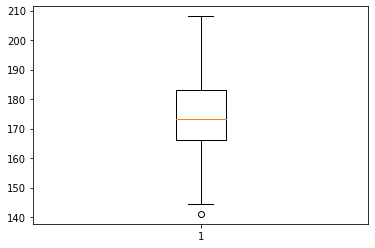

In [1130]:
plt.boxplot(data.length)

(array([ 3.,  3., 29., 23., 54., 39., 23., 20.,  8.,  3.]),
 array([141.1, 147.8, 154.5, 161.2, 167.9, 174.6, 181.3, 188. , 194.7,
        201.4, 208.1]),
 <BarContainer object of 10 artists>)

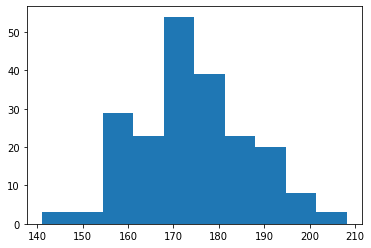

In [1131]:
plt.hist(data.length)

In [1132]:
stats.shapiro(data.length)

ShapiroResult(statistic=0.9820953607559204, pvalue=0.01036272943019867)

<H6>
DATA IS NOT NORMALLY DISTRIBUTED
<H6>

<H6>
COLUMN 12: WIDTH
    <H6>

In [1133]:
data.width.describe()

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: width, dtype: float64

In [1134]:
data.width.isnull().sum()

0

In [1135]:
data.width.unique()

array([64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64.8, 66.9, 70.9, 60.3,
       63.6, 63.8, 64.6, 63.9, 64. , 65.2, 62.5, 66. , 61.8, 69.6, 70.6,
       64.2, 65.7, 66.5, 66.1, 70.3, 71.7, 70.5, 72. , 68. , 64.4, 65.4,
       68.4, 68.3, 65. , 72.3, 66.6, 63.4, 65.6, 67.7, 67.2, 68.9, 68.8])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ead35e2c70>,
 'caps': [<matplotlib.lines.Line2D at 0x1ead35f13d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ead35e28e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ead35f1af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ead35f1e80>],
 'means': []}

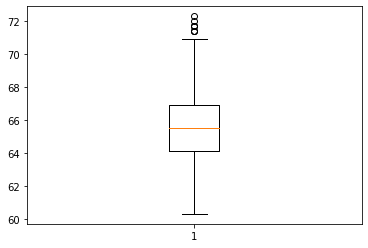

In [1136]:
plt.boxplot(data.width)

(array([ 1.,  2., 36., 39., 44., 42., 20.,  7.,  6.,  8.]),
 array([60.3, 61.5, 62.7, 63.9, 65.1, 66.3, 67.5, 68.7, 69.9, 71.1, 72.3]),
 <BarContainer object of 10 artists>)

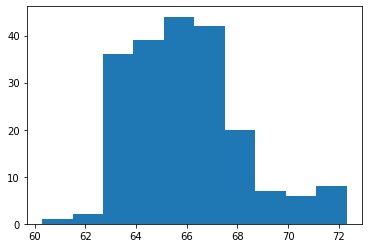

In [1137]:
plt.hist(data.width)

In [1138]:
stats.shapiro(data.width)

ShapiroResult(statistic=0.9210780262947083, pvalue=5.012857240416224e-09)

<H6>
The Data is not normally distributed
<H6>

<H6>
COLUMN 13: HEIGHT
    <H6>

In [1139]:
data.height.describe()

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64

In [1140]:
data.height.isnull().sum()

0

In [1141]:
data.height.unique()

array([48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52. , 53.7, 56.3, 53.2, 50.8,
       50.6, 59.8, 50.2, 52.6, 54.5, 58.3, 53.3, 54.1, 51. , 53.5, 51.4,
       52.8, 47.8, 49.6, 55.5, 54.4, 56.5, 58.7, 54.9, 56.7, 55.4, 54.8,
       49.4, 51.6, 54.7, 55.1, 56.1, 49.7, 56. , 50.5, 55.2, 52.5, 53. ,
       59.1, 53.9, 55.6, 56.2, 57.5])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ead36c2d00>,
 'caps': [<matplotlib.lines.Line2D at 0x1ead36d3490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ead36c2970>],
 'medians': [<matplotlib.lines.Line2D at 0x1ead36d3bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ead36d3f40>],
 'means': []}

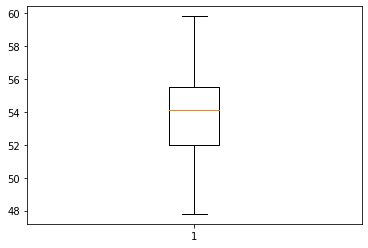

In [1142]:
plt.boxplot(data.height)

(array([ 3.,  9., 28., 25., 33., 41., 38., 15.,  4.,  9.]),
 array([47.8, 49. , 50.2, 51.4, 52.6, 53.8, 55. , 56.2, 57.4, 58.6, 59.8]),
 <BarContainer object of 10 artists>)

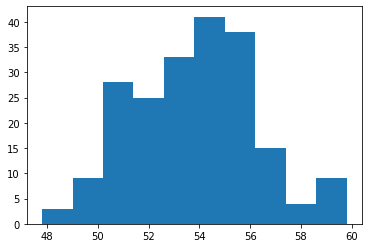

In [1143]:
plt.hist(data.height)

In [1144]:
stats.shapiro(data.height)

ShapiroResult(statistic=0.9842321276664734, pvalue=0.021682262420654297)

<H6>
P VALUE < ALPHA SO NOT NORMAL DISTRIBUTION
<H6>

<H6>
COLUMN 14:CURB-WEIGHT
    <H6>

In [1145]:
data.curb_weight.describe()

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curb_weight, dtype: float64

In [1146]:
data.curb_weight.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1ead37b92b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ead37b99d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ead37a8ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ead37c5130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ead37c54c0>],
 'means': []}

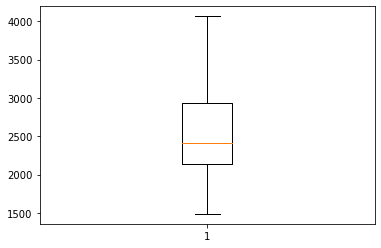

In [1147]:
plt.boxplot(data.curb_weight)

(array([ 2., 29., 33., 50., 25., 23., 26.,  8.,  5.,  4.]),
 array([1488. , 1745.8, 2003.6, 2261.4, 2519.2, 2777. , 3034.8, 3292.6,
        3550.4, 3808.2, 4066. ]),
 <BarContainer object of 10 artists>)

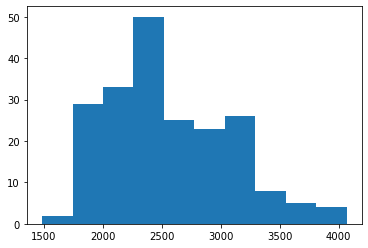

In [1148]:
plt.hist(data.curb_weight)

In [1149]:
stats.shapiro(data.curb_weight)

ShapiroResult(statistic=0.9530424475669861, pvalue=2.8916113024024526e-06)

<H6>
p value<0.05 so, not normally distributed
<H6>

<H6>
COLUMN 15: ENGINE TYPE
    <H6>

In [1150]:
data.engine_type.describe()

count     205
unique      7
top       ohc
freq      148
Name: engine_type, dtype: object

In [1151]:
data.engine_type.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

In [1152]:
data.engine_type.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_type', ylabel='count'>

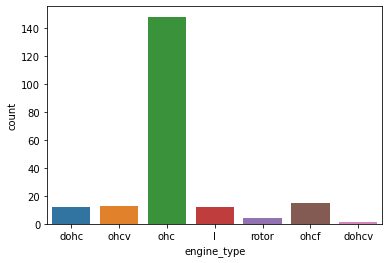

In [1153]:
sns.countplot(data.engine_type)

In [1154]:
data.engine_type.replace(['dohc','ohcv','l','rotor','ohcf','dohcv'],['non ohc','non ohc','non ohc','non ohc','non ohc','non ohc'],inplace=True)

In [1155]:
data.engine_type.value_counts()

ohc        148
non ohc     57
Name: engine_type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine_type', ylabel='count'>

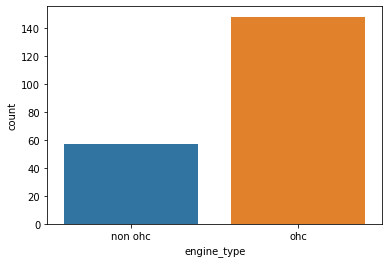

In [1156]:
sns.countplot(data.engine_type)

<H6>
    COLUMN 16:NUMBER OF CYLINDERS
    <H6>

In [1157]:
data.no_cyl.describe()

count      205
unique       7
top       four
freq       159
Name: no_cyl, dtype: object

In [1158]:
data.no_cyl.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: no_cyl, dtype: int64

In [1159]:
data.no_cyl.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_cyl', ylabel='count'>

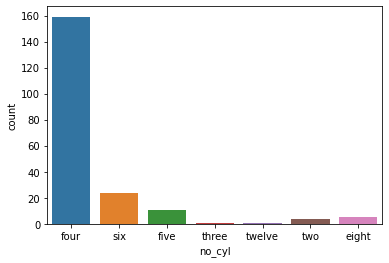

In [1160]:
sns.countplot(data.no_cyl)

In [1161]:
data.no_cyl.replace(['six','five','three','twelve','two','eight'],['other than four','other than four','other than four','other than four','other than four','other than four'],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_cyl', ylabel='count'>

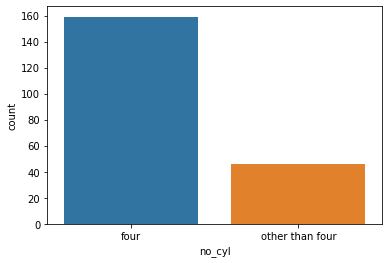

In [1162]:
sns.countplot(data.no_cyl)

<H6>
COLUMN 17 :ENGINE SIZE
    <H6>

In [1163]:
data.engine_size.describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine_size, dtype: float64

In [1164]:
data.engine_size.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1ead3a58fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ead3a66730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ead3a58c40>],
 'medians': [<matplotlib.lines.Line2D at 0x1ead3a66e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ead3a73220>],
 'means': []}

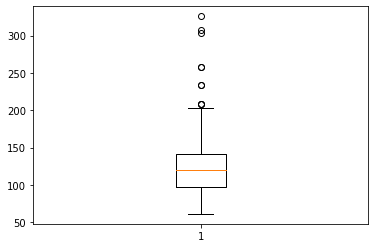

In [1165]:
plt.boxplot(data.engine_size)

In [1166]:
data.engine_size.unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145], dtype=int64)

(array([ 6., 95., 46., 30., 14.,  7.,  2.,  2.,  0.,  3.]),
 array([ 61. ,  87.5, 114. , 140.5, 167. , 193.5, 220. , 246.5, 273. ,
        299.5, 326. ]),
 <BarContainer object of 10 artists>)

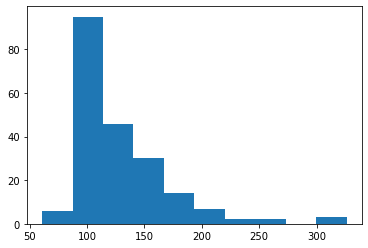

In [1167]:
plt.hist(data.engine_size)

In [1168]:
stats.shapiro(data.engine_size)

ShapiroResult(statistic=0.8294388651847839, pvalue=3.0569154792128156e-14)

<H6>
P VALUE IS LOW SO NOT NORMAL DISTRIBUTION
<H6>

<H6>
COLUMN 18: FUEL SYSTEM
    <H6>

In [1169]:
data.fuel_system.describe()

count      205
unique       8
top       mpfi
freq        94
Name: fuel_system, dtype: object

In [1170]:
data.fuel_system.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel_system, dtype: int64

In [1171]:
data.fuel_system.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_system', ylabel='count'>

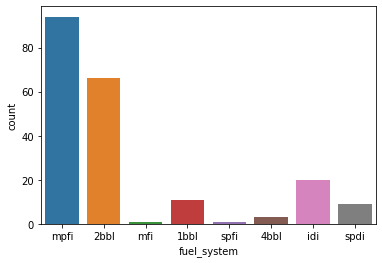

In [1172]:
sns.countplot(data.fuel_system)

In [1173]:
data.fuel_system.replace(['mfi','1bbl','spfi','4bbl','idi','spdi'],['others','others','others','others','others','others'],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel_system', ylabel='count'>

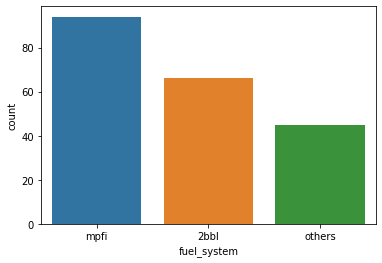

In [1174]:
sns.countplot(data.fuel_system)

<H6>
COLUMN 19:BORE
    <H6>

In [1175]:
data.bore.describe()

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

In [1176]:
data.bore.isnull().sum()

4

In [1177]:
data.bore.unique()

array([3.47, 2.68, 3.19, 3.13, 3.5 , 3.31, 3.62, 2.91, 3.03, 2.97, 3.34,
       3.6 , 2.92, 3.15, 3.43, 3.63, 3.54, 3.08,  nan, 3.39, 3.76, 3.58,
       3.46, 3.8 , 3.78, 3.17, 3.35, 3.59, 2.99, 3.33, 3.7 , 3.61, 3.94,
       3.74, 2.54, 3.05, 3.27, 3.24, 3.01])

In [1178]:
data.bore.fillna(data.bore.mean(),inplace=True)

In [1179]:
data.bore.unique()

array([3.47      , 2.68      , 3.19      , 3.13      , 3.5       ,
       3.31      , 3.62      , 2.91      , 3.03      , 2.97      ,
       3.34      , 3.6       , 2.92      , 3.15      , 3.43      ,
       3.63      , 3.54      , 3.08      , 3.32975124, 3.39      ,
       3.76      , 3.58      , 3.46      , 3.8       , 3.78      ,
       3.17      , 3.35      , 3.59      , 2.99      , 3.33      ,
       3.7       , 3.61      , 3.94      , 3.74      , 2.54      ,
       3.05      , 3.27      , 3.24      , 3.01      ])

In [1180]:
data.bore.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1ead1d48eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ead1d57610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ead1d48b20>],
 'medians': [<matplotlib.lines.Line2D at 0x1ead1d57d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ead1d66100>],
 'means': []}

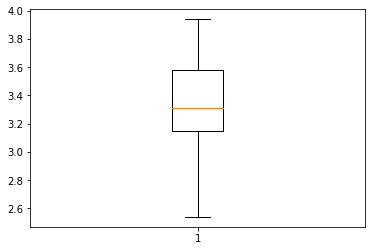

In [1181]:
plt.boxplot(data.bore)

(array([ 1.,  1.,  8., 37., 40., 28., 27., 42., 17.,  4.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <BarContainer object of 10 artists>)

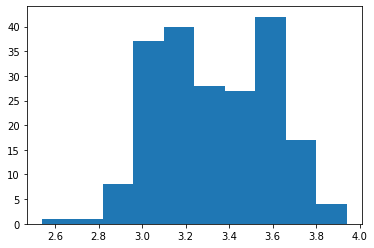

In [1182]:
plt.hist(data.bore)

In [1183]:
stats.shapiro(data.bore)

ShapiroResult(statistic=0.967185378074646, pvalue=0.00010421191109344363)

<H6>
Not normallay distributed
<H6>

<H6>
COLUMN 20: STROKE
    <H6>

In [1184]:
data.stroke.describe()

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [1185]:
data.stroke.isnull().sum()

4

In [1186]:
data.stroke.unique()

array([2.68, 3.47, 3.4 , 2.8 , 3.19, 3.39, 3.03, 3.11, 3.23, 3.46, 3.9 ,
       3.41, 3.07, 3.58, 4.17, 2.76, 3.15,  nan, 3.16, 3.64, 3.1 , 3.35,
       3.12, 3.86, 3.29, 3.27, 3.52, 2.19, 3.21, 2.9 , 2.07, 2.36, 2.64,
       3.08, 3.5 , 3.54, 2.87])

In [1187]:
data.stroke.fillna(data.stroke.mean(),inplace=True)

In [1188]:
data.stroke.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1ead3b175e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ead3b17d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ead3b17250>],
 'medians': [<matplotlib.lines.Line2D at 0x1ead3b21310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ead3b216a0>],
 'means': []}

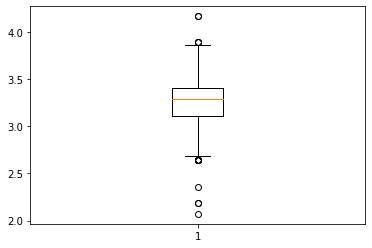

In [1189]:
plt.boxplot(data.stroke)

In [1190]:
data.stroke.unique()

array([2.68      , 3.47      , 3.4       , 2.8       , 3.19      ,
       3.39      , 3.03      , 3.11      , 3.23      , 3.46      ,
       3.9       , 3.41      , 3.07      , 3.58      , 4.17      ,
       2.76      , 3.15      , 3.25542289, 3.16      , 3.64      ,
       3.1       , 3.35      , 3.12      , 3.86      , 3.29      ,
       3.27      , 3.52      , 2.19      , 3.21      , 2.9       ,
       2.07      , 2.36      , 2.64      , 3.08      , 3.5       ,
       3.54      , 2.87      ])

(array([ 3.,  1., 13.,  7., 30., 56., 71., 15.,  7.,  2.]),
 array([2.07, 2.28, 2.49, 2.7 , 2.91, 3.12, 3.33, 3.54, 3.75, 3.96, 4.17]),
 <BarContainer object of 10 artists>)

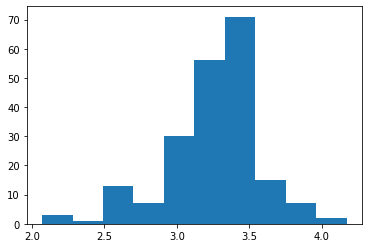

In [1191]:
plt.hist(data.stroke)

In [1192]:
stats.shapiro(data.stroke)

ShapiroResult(statistic=0.9377973675727844, pvalue=1.0984009435333064e-07)

<H6>
Not normallay distributed
<H6>

<H6>
COLUMN 21:COMPRESSION RATIO
<H6>

In [1193]:
data.com_ratio.describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: com_ratio, dtype: float64

In [1194]:
data.com_ratio.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1ead3bf2a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1ead3c001f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ead3bf2700>],
 'medians': [<matplotlib.lines.Line2D at 0x1ead3c00910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ead3c00ca0>],
 'means': []}

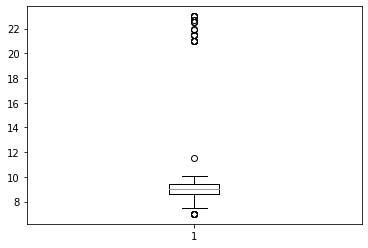

In [1195]:
plt.boxplot(data.com_ratio)

In [1196]:
data.com_ratio.unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

(array([ 51., 133.,   1.,   0.,   0.,   0.,   0.,   0.,   5.,  15.]),
 array([ 7. ,  8.6, 10.2, 11.8, 13.4, 15. , 16.6, 18.2, 19.8, 21.4, 23. ]),
 <BarContainer object of 10 artists>)

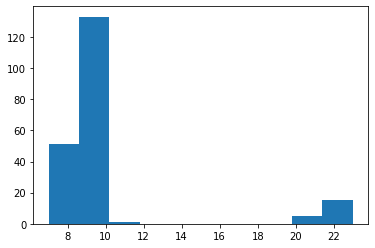

In [1197]:
plt.hist(data.com_ratio)

In [1198]:
stats.shapiro(data.com_ratio)

ShapiroResult(statistic=0.49774158000946045, pvalue=8.12114079238121e-24)

<H6>
Not normallay distributed
<H6>

<H6>
COLUMN 22:  HORSEPOWER
<H6>

In [1199]:
data.hpower.describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: hpower, dtype: float64

In [1200]:
data.hpower.isnull().sum()

2

In [1201]:
data.hpower.unique()

array([111., 154., 102., 115., 110., 140., 160., 101., 121., 182.,  48.,
        70.,  68.,  88., 145.,  58.,  76.,  60.,  86., 100.,  78.,  90.,
       176., 262., 135.,  84.,  64., 120.,  72., 123., 155., 184., 175.,
       116.,  69.,  55.,  97., 152., 200.,  95., 142., 143., 207., 288.,
        nan,  73.,  82.,  94.,  62.,  56., 112.,  92., 161., 156.,  52.,
        85., 114., 162., 134., 106.])

In [1202]:
data.hpower.fillna(data.hpower.mean(),inplace=True)

In [1203]:
data.hpower.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1ead3ce95e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ead3ce9d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ead3ce9250>],
 'medians': [<matplotlib.lines.Line2D at 0x1ead3cf3460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ead3cf37f0>],
 'means': []}

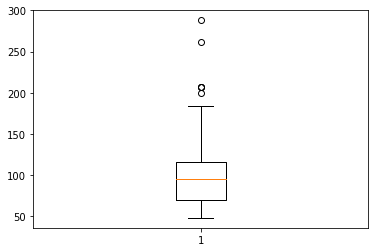

In [1204]:
plt.boxplot(data.hpower)

(array([55., 49., 51., 13., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([ 48.,  72.,  96., 120., 144., 168., 192., 216., 240., 264., 288.]),
 <BarContainer object of 10 artists>)

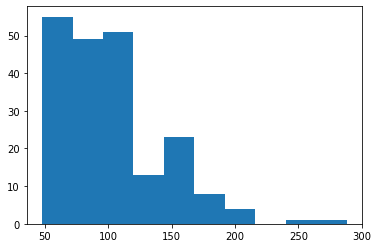

In [1205]:
plt.hist(data.hpower)

In [1206]:
stats.shapiro(data.hpower)

ShapiroResult(statistic=0.8850876688957214, pvalue=2.11449850684442e-11)

<H6>
Not normallay distributed
<H6>

<H6>
COLUMN 23:  PEAK RPM
<H6>

In [1207]:
data.peak_rpm.describe()

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak_rpm, dtype: float64

In [1208]:
data.peak_rpm.isnull().sum()

2

In [1209]:
data.peak_rpm.unique()

array([5000., 5500., 5800., 4250., 5400., 5100., 4800., 6000., 4750.,
       4650., 4200., 4350., 4500., 5200., 4150., 5600., 5900., 5750.,
         nan, 5250., 4900., 4400., 6600., 5300.])

In [1210]:
data.peak_rpm.fillna(data.peak_rpm.mean(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ead5581790>,
 'caps': [<matplotlib.lines.Line2D at 0x1ead5581d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ead5581460>],
 'medians': [<matplotlib.lines.Line2D at 0x1ead558c490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ead558c820>],
 'means': []}

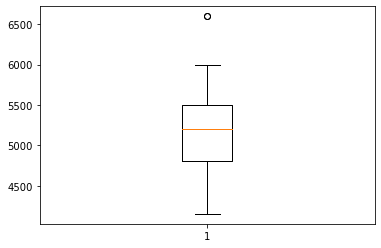

In [1211]:
plt.boxplot(data.peak_rpm)

(array([17., 10., 41., 33., 31., 51.,  8., 12.,  0.,  2.]),
 array([4150., 4395., 4640., 4885., 5130., 5375., 5620., 5865., 6110.,
        6355., 6600.]),
 <BarContainer object of 10 artists>)

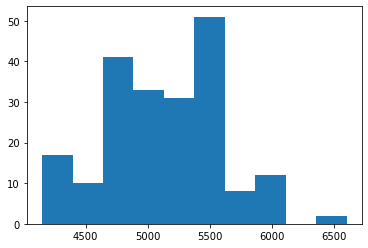

In [1212]:
plt.hist(data.peak_rpm)

In [1213]:
stats.shapiro(data.peak_rpm)

ShapiroResult(statistic=0.9705138802528381, pvalue=0.000267903262283653)

<H6>
Not normallay distributed
<H6>

<H6>
COLUMN 24: CITY MPG
<H6>

In [1214]:
data.city_mpg.describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city_mpg, dtype: float64

In [1215]:
data.city_mpg.unique()

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33], dtype=int64)

In [1216]:
data.city_mpg.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1ead565d160>,
 'caps': [<matplotlib.lines.Line2D at 0x1ead565d880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ead564dd90>],
 'medians': [<matplotlib.lines.Line2D at 0x1ead565dfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ead5669370>],
 'means': []}

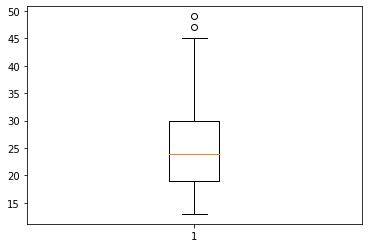

In [1217]:
plt.boxplot(data.city_mpg)

(array([12., 46., 24., 56., 18., 31., 15.,  0.,  1.,  2.]),
 array([13. , 16.6, 20.2, 23.8, 27.4, 31. , 34.6, 38.2, 41.8, 45.4, 49. ]),
 <BarContainer object of 10 artists>)

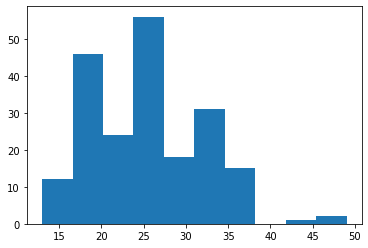

In [1218]:
plt.hist(data.city_mpg)

In [1219]:
stats.shapiro(data.city_mpg)

ShapiroResult(statistic=0.9572238922119141, pvalue=7.825866305211093e-06)

<H6>
Not normallay distributed
<H6>

<H6>
COLUMN 25:HIGHWAY MPG
<H6>

In [1220]:
data.high_mpg.describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: high_mpg, dtype: float64

In [1221]:
data.high_mpg.isnull().sum()

0

In [1222]:
data.high_mpg.unique()

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46], dtype=int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ead5739fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ead5749730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ead5739c10>],
 'medians': [<matplotlib.lines.Line2D at 0x1ead5749e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ead5755220>],
 'means': []}

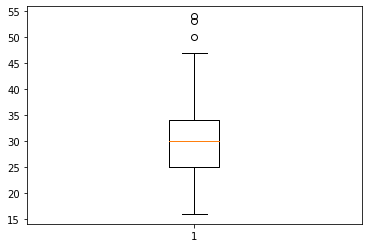

In [1223]:
plt.boxplot(data.high_mpg)

(array([ 7., 17., 44., 47., 39., 32.,  8.,  6.,  3.,  2.]),
 array([16. , 19.8, 23.6, 27.4, 31.2, 35. , 38.8, 42.6, 46.4, 50.2, 54. ]),
 <BarContainer object of 10 artists>)

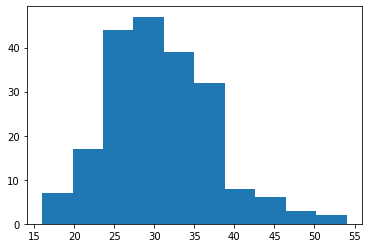

In [1224]:
plt.hist(data.high_mpg)

In [1225]:
stats.shapiro(data.high_mpg)

ShapiroResult(statistic=0.9735103845596313, pvalue=0.0006515368004329503)

<H6>
Not normallay distributed
<H6>

<H6>
COLUMN 26 : PRICE
<H6>

In [1226]:
data.price.describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [1227]:
data.price.isnull().sum()

4

In [1228]:
data.price.unique()

array([13495., 16500., 13950., 17450., 15250., 17710., 18920., 23875.,
          nan, 16430., 16925., 20970., 21105., 24565., 30760., 41315.,
       36880.,  5151.,  6295.,  6575.,  5572.,  6377.,  7957.,  6229.,
        6692.,  7609.,  8558.,  8921., 12964.,  6479.,  6855.,  5399.,
        6529.,  7129.,  7295.,  7895.,  9095.,  8845., 10295., 12945.,
       10345.,  6785., 11048., 32250., 35550., 36000.,  5195.,  6095.,
        6795.,  6695.,  7395., 10945., 11845., 13645., 15645.,  8495.,
       10595., 10245., 10795., 11245., 18280., 18344., 25552., 28248.,
       28176., 31600., 34184., 35056., 40960., 45400., 16503.,  5389.,
        6189.,  6669.,  7689.,  9959.,  8499., 12629., 14869., 14489.,
        6989.,  8189.,  9279.,  5499.,  7099.,  6649.,  6849.,  7349.,
        7299.,  7799.,  7499.,  7999.,  8249.,  8949.,  9549., 13499.,
       14399., 17199., 19699., 18399., 11900., 13200., 12440., 13860.,
       15580., 16900., 16695., 17075., 16630., 17950., 18150., 12764.,
      

In [1229]:
data.price.fillna(13207.12,inplace=True)

In [1230]:
data.price.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1ead582fa30>,
 'caps': [<matplotlib.lines.Line2D at 0x1ead583e190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ead582f670>],
 'medians': [<matplotlib.lines.Line2D at 0x1ead583e8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ead583ec40>],
 'means': []}

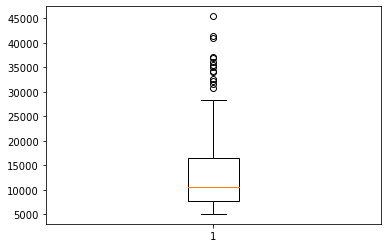

In [1231]:
plt.boxplot(data.price)

(array([81., 45., 39., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

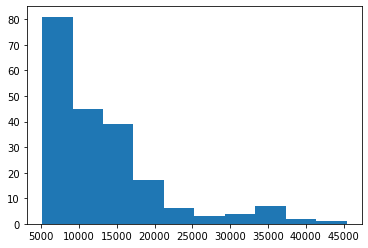

In [1232]:
plt.hist(data.price)

In [1233]:
stats.shapiro(data.price)

ShapiroResult(statistic=0.7997005581855774, pvalue=1.691838515494677e-15)

<H6>
Not normallay distributed
<H6>

<H2>
MODEL CREATION
<H2>

<H6>
Y=PRICE ------------------AND  X= INDEPENDENT PARAMETERS
<H6>

<H6>
Strength testing
<H6>

In [1234]:
strength=stats.pearsonr(data.nor_los,data.price)
print(strength)

(0.13399873429274156, 0.055430578263185495)


In [1235]:
strength=stats.pearsonr(data.wheel_base,data.price)
print(strength)

(0.5831681578420751, 4.527619099752949e-20)


In [1236]:
strength=stats.pearsonr(data.length,data.price)
print(strength)

(0.682986309841956, 1.6498811196243998e-29)


In [1237]:
strength=stats.pearsonr(data.width,data.price)
print(strength)

(0.7286988073565407, 3.214530906958775e-35)


In [1238]:
strength=stats.pearsonr(data.height,data.price)
print(strength)

(0.13438753873967407, 0.05471978406313776)


In [1239]:
strength=stats.pearsonr(data.curb_weight,data.price)
print(strength)

(0.8208247335814778, 2.8663317742973685e-51)


In [1240]:
strength=stats.pearsonr(data.engine_size,data.price)
print(strength)

(0.8617522427945548, 9.669667792068792e-62)


In [1241]:
strength=stats.pearsonr(data.bore,data.price)
print(strength)

(0.5323000236048456, 2.1398293235758156e-16)


In [1242]:
strength=stats.pearsonr(data.stroke,data.price)
print(strength)

(0.08209530096106149, 0.24191453739058402)


In [1243]:
strength=stats.pearsonr(data.com_ratio,data.price)
print(strength)

(0.07099036918974042, 0.31178244814226413)


In [1244]:
strength=stats.pearsonr(data.hpower,data.price)
print(strength)

(0.7579169285411245, 1.6076851026400954e-39)


In [1245]:
strength=stats.pearsonr(data.peak_rpm,data.price)
print(strength)

(-0.10085408482828398, 0.15019239267007353)


In [1246]:
strength=stats.pearsonr(data.city_mpg,data.price)
print(strength)

(-0.6674492723937713, 8.463685448059471e-28)


In [1247]:
strength=stats.pearsonr(data.high_mpg,data.price)
print(strength)

(-0.69052574511372, 2.2324607940569938e-30)


<H6>
hyposthesis testing-------------------------------------
x=parameters----------------------------------------------
y=price---------------------------------------------------------
H0:paramesters does not affect price------------------------
H1:paramesters affect price---------------------------------------------
    <H6>

In [1248]:
part1=data.price[data.sym=="less than zero"]
part2=data.price[data.sym=="zero"]
part3=data.price[data.sym=="one"]
part4=data.price[data.sym=="two"]
part5=data.price[data.sym=="three"]
stats.f_oneway(part1,part2,part3,part4,part5)

F_onewayResult(statistic=8.596939521544897, pvalue=2.0165658403686097e-06)

In [1249]:
part1=data.price[data.make=="alfa-romero"]
part2=data.price[data.make=="audi"]
part3=data.price[data.make=="bmw"]
part4=data.price[data.make=="chevrolet"]
part5=data.price[data.make=="dodge"]
part6=data.price[data.make=="honda"]
part7=data.price[data.make=="isuzu"]
part8=data.price[data.make=="jaguar"]
part9=data.price[data.make=="mazda"]
part10=data.price[data.make=="mercedes-benz"]
part11=data.price[data.make=="mercury"]
part12=data.price[data.make=="mitsubishi"]
part13=data.price[data.make=="nissan"]
part14=data.price[data.make=="peugot"]
part15=data.price[data.make=="plymouth"]
part16=data.price[data.make=="porsche"]
part17=data.price[data.make=="renault"]
part18=data.price[data.make=="saab"]
part19=data.price[data.make=="subaru"]
part20=data.price[data.make=="toyota"]
part21=data.price[data.make=="volkswagen"]
part22=data.price[data.make=="volvo"]
stats.f_oneway(part1,part2,part3,part4,part5,part6,part7,part8,part9,part10,part11,part12,part13,part14,part15,part16,part17,part18,part19,part20,part21,part22)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


F_onewayResult(statistic=29.50221197366595, pvalue=1.0198262293854049e-47)

In [1250]:
part1=data.price[data.fuel_type=="gas"]
part2=data.price[data.fuel_type=="diesel"]
stats.f_oneway(part1,part2)

F_onewayResult(statistic=2.4958593265784024, pvalue=0.11570294984522285)

In [1251]:
part1=data.price[data.asp=="std"]
part2=data.price[data.asp=="turbo"]
stats.f_oneway(part1,part2)

F_onewayResult(statistic=6.587289532724407, pvalue=0.01099104840531903)

In [1252]:
part1=data.price[data.no_door=="two"]
part2=data.price[data.no_door=="four"]
stats.f_oneway(part1,part2)

F_onewayResult(statistic=0.3577854189236959, pvalue=0.5504054958228669)

In [1253]:
part1=data.price[data.body_style=="convertible"]
part2=data.price[data.body_style=="hatchback"]
part3=data.price[data.body_style=="sedan"]
part4=data.price[data.body_style=="wagon"]
part5=data.price[data.body_style=="hardtop"]
stats.f_oneway(part1,part2,part3,part4,part5)

F_onewayResult(statistic=9.18392765311025, pvalue=7.844570683523211e-07)

In [1254]:
part1=data.price[data.d_wheel=="not fwd"]
part2=data.price[data.d_wheel=="fwd"]
stats.f_oneway(part1,part2)

F_onewayResult(statistic=108.27334726415472, pvalue=1.349033748481625e-20)

In [1255]:
part1=data.price[data.engine_loc=="front"]
part2=data.price[data.engine_loc=="rear"]
stats.f_oneway(part1,part2)

F_onewayResult(statistic=24.979629670708995, pvalue=1.2486060888224299e-06)

In [1256]:
part1=data.price[data.engine_type=="non ohc"]
part2=data.price[data.engine_type=="ohc"]
stats.f_oneway(part1,part2)

F_onewayResult(statistic=24.772969672565715, pvalue=1.373687171199218e-06)

In [1257]:
part1=data.price[data.no_cyl=="four"]
part2=data.price[data.no_cyl=="other than four"]
stats.f_oneway(part1,part2)

F_onewayResult(statistic=173.7914541480181, pvalue=4.465239260543058e-29)

In [1258]:
part1=data.price[data.fuel_system=="mpfi"]
part2=data.price[data.fuel_system=="2bbl"]
part3=data.price[data.fuel_system=="others"]
stats.f_oneway(part1,part2,part3)

F_onewayResult(statistic=44.083895762873645, pvalue=1.2969363967473907e-16)

<H6>
Y=PRICE
X=HORSE POWER,ENGINE SIZE,CRUB WEIGHT,WIDTH----------------------------------
CREAT EQUATION
<H6>

In [1259]:
y=data.price


In [1270]:
x=data.drop(['price','nor_los','wheel_base','length','height','bore','stroke','com_ratio','peak_rpm','city_mpg','high_mpg','no_door','fuel_type','sym', 'make', 'asp','body_style', 'd_wheel','engine_loc', 'engine_type', 'no_cyl','fuel_system'],axis=1)

In [1271]:
x.columns

Index(['width', 'curb_weight', 'engine_size', 'hpower'], dtype='object')

In [1272]:
x.shape

(205, 4)

In [1273]:
y.shape

(205,)

In [1274]:
train_y=y.iloc[0:164]


In [1275]:
test_y=y.iloc[164:]


In [1276]:
train_x=x.iloc[0:164]


In [1277]:
test_x=x.iloc[164:]


In [1278]:
x.shape

(205, 4)

In [1283]:
x1=train_x
x2=test_x

In [1291]:
train_x=sm.add_constant(train_x)
test_x=sm.add_constant(test_x)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [1292]:
model=sm.OLS(train_y,train_x).fit()

In [1293]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     154.1
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           1.28e-53
Time:                        21:32:56   Log-Likelihood:                -1586.9
No. Observations:                 164   AIC:                             3184.
Df Residuals:                     159   BIC:                             3199.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.277e+04   1.58e+04     -1.445      0.151   -5.39e+04    8357.972
width         183.8592    276.683      0.665      0.507    -362.589     730.307
curb_weight     3.0052      1.476      2.037      0.043       0.091       5.919
engine_size   106.2351     15.368      6.913      0.000      75.883     136.588
hpower         28.1846     12.967      2.174      0.031       2.575      53.794
==============================================================================
Omnibus:                       18.943   Durbin-Watson:                   1.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.485
Skew:                           0.154   Prob(JB):                     4.06e-17
Kurtosis:                       6.309   Cond. No.                     1.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1294]:
predicted_y=model.predict(test_x)


<AxesSubplot:xlabel='hpower', ylabel='price'>

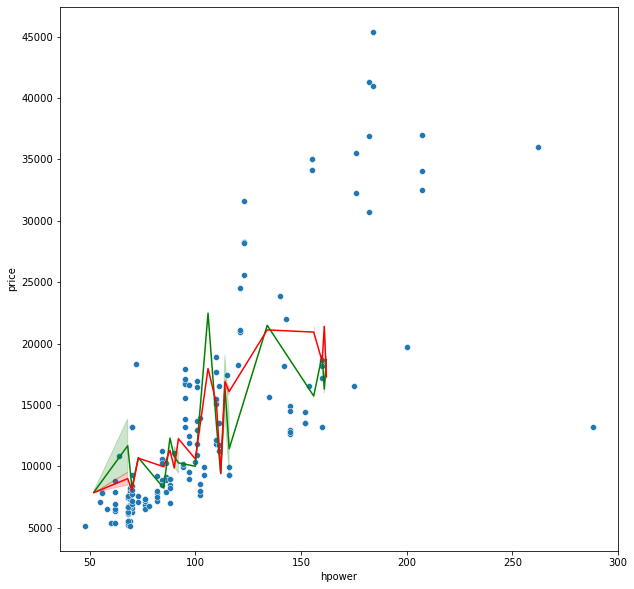

In [1296]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train_x.hpower,y=train_y)
sns.lineplot(x=test_x.hpower,y=test_y,color='green')
sns.lineplot(x=test_x.hpower,y=predicted_y,color='red')

<AxesSubplot:xlabel='curb_weight', ylabel='price'>

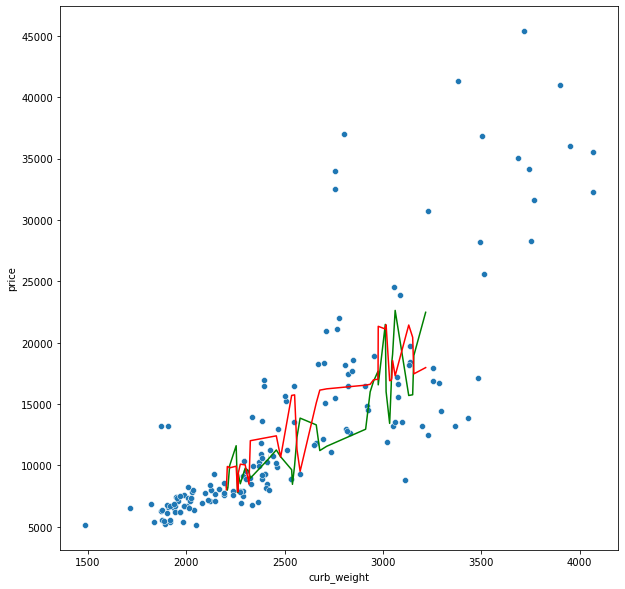

In [1297]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train_x.curb_weight,y=train_y)
sns.lineplot(x=test_x.curb_weight,y=test_y,color='green')
sns.lineplot(x=test_x.curb_weight,y=predicted_y,color='red')

<AxesSubplot:xlabel='engine_size', ylabel='price'>

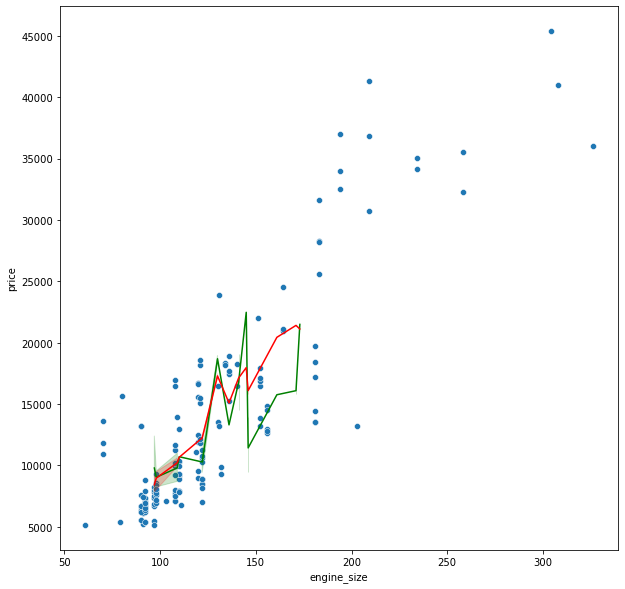

In [1298]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=train_x.engine_size,y=train_y)
sns.lineplot(x=test_x.engine_size,y=test_y,color='green')
sns.lineplot(x=test_x.engine_size,y=predicted_y,color='red')